In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv',delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


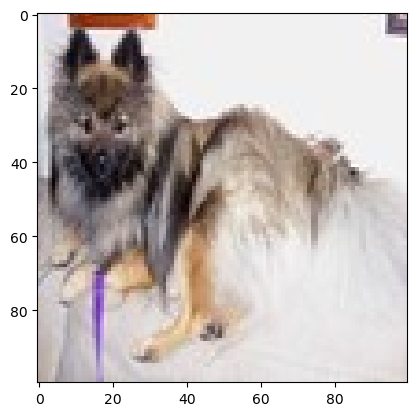

In [5]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 7s 197ms/step - loss: 0.1932 - accuracy: 0.9280
Epoch 2/5
32/32 [==============================] - 7s 216ms/step - loss: 0.1331 - accuracy: 0.9565
Epoch 3/5
32/32 [==============================] - 7s 223ms/step - loss: 0.1060 - accuracy: 0.9705
Epoch 4/5
32/32 [==============================] - 7s 209ms/step - loss: 0.0940 - accuracy: 0.9750
Epoch 5/5
32/32 [==============================] - 7s 221ms/step - loss: 0.0833 - accuracy: 0.9815


In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 1.0372 - accuracy: 0.6900


[1.0371640920639038, 0.6899999976158142]

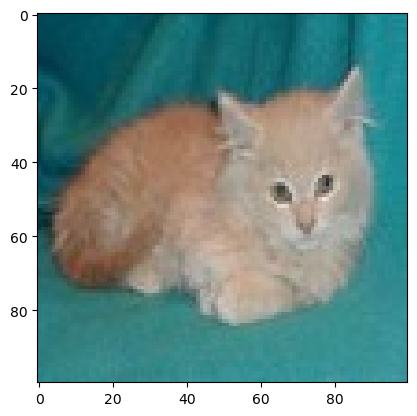

1/1 [==============================] - 0s 20ms/step
Our model says it is a : cat


In [17]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 574s 3us/step


(50000, 32, 32, 3)

In [48]:
X_test.shape

(10000, 32, 32, 3)

In [49]:
y_train.shape

(50000, 1)

In [50]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [51]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [52]:
y_test = y_test.reshape(-1,)

In [53]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [54]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

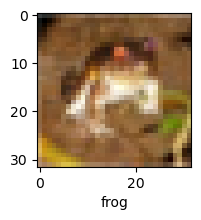

In [55]:
plot_sample(X_train, y_train, 0)

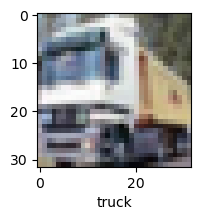

In [56]:
plot_sample(X_train, y_train, 1)

In [57]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [58]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.8152 - accuracy: 0.3531
Epoch 2/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.6277 - accuracy: 0.4235
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5451 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4842 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 74s 48ms/step - loss: 1.4350 - accuracy: 0.4934


In [60]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.44      0.53      1000
           1       0.58      0.62      0.60      1000
           2       0.44      0.30      0.36      1000
           3       0.34      0.34      0.34      1000
           4       0.37      0.45      0.41      1000
           5       0.43      0.36      0.39      1000
           6       0.45      0.67      0.54      1000
           7       0.59      0.54      0.56      1000
           8       0.62      0.62      0.62      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [61]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [62]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.4926 - accuracy: 0.4601
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1423 - accuracy: 0.5967
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0008 - accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9131 - accuracy: 0.6860
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8463 - accuracy: 0.7061
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7820 - accuracy: 0.7291
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7344 - accuracy: 0.7451
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6867 - accuracy: 0.7616
Epoch 9/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6490 - accuracy: 0.7731
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [64]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9315 - accuracy: 0.6936


[0.9315356612205505, 0.6935999989509583]

In [65]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[1.2735728e-03, 1.6519061e-03, 2.2935757e-02, 9.1731220e-01,
        3.7138835e-03, 3.3947490e-02, 1.8765117e-03, 8.0746642e-05,
        1.6157225e-02, 1.0507958e-03],
       [7.3685311e-03, 7.4194497e-01, 3.3575656e-05, 8.6424933e-08,
        2.0131872e-06, 5.6015455e-07, 3.6331780e-09, 3.7371940e-08,
        2.4916986e-01, 1.4804140e-03],
       [6.8413280e-02, 3.1451145e-01, 1.4818154e-03, 3.3427012e-04,
        8.3090208e-04, 3.9495822e-04, 2.2491445e-06, 1.3533842e-03,
        5.9705460e-01, 1.5623121e-02],
       [9.6195495e-01, 1.5192088e-03, 2.5379874e-02, 2.1629025e-04,
        4.9117091e-04, 2.9230639e-05, 1.3352121e-06, 1.2357925e-03,
        9.1559961e-03, 1.6140137e-05],
       [1.0830833e-05, 1.3792917e-05, 4.1110475e-02, 9.7063705e-02,
        7.4001765e-01, 5.5548716e-03, 1.1619913e-01, 1.0569822e-05,
        1.5538173e-05, 3.4222960e-06]], dtype=float32)

In [66]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [67]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

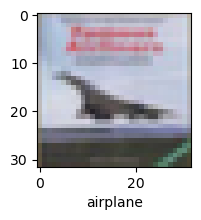

In [68]:
plot_sample(X_test, y_test,3)

In [69]:
classes[y_classes[3]]

'airplane'